# Visualize weather data from https://www.earthsystemgrid.org/dataset/isabeldata.html

Written by Jean M Favre, Swiss National Supercomputing Center.
Tested on Piz Daint Thu 01 Oct 2020 08:38:49 AM CEST

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from itkwidgets import view, line_profile

# Details about file format are here:

https://www.earthsystemgrid.org/dataset/isabeldata/file/readme.html

http://vis.computer.org/vis2004contest/data.html

Data Format

A summary of the data can be found below:

    Dimensions: 500 x 500 x 100
    Physical Scale: 2139km (east-west) x 2004km (north-south) x 19.8km (vertical) Note: The east-west distance of 2139km is measured at the southern latitude; the distance is only 1741km at the northern latitude due to the curvature of the earth.
    Physical Location: Longitude (x): 83W to 62W; Latitude (y): 23.7N to 41.7N; Height (z): 0.035km to 19.835km
    Format: Brick-of-Floats

In [2]:
dims = [500,500,100] # original dimensions of binary data in disk file

def load_slice(frame_number, K):
  assert frame_number >= 1 and frame_number <= 48
  fname_gzipped = format('/scratch/snx3000/jfavre/Isabel/QVAPORf%02d.bin.gz' % frame_number)
  print("opening ", fname_gzipped)
  with gzip.open(fname_gzipped,'rb') as f:
    # read a single slice in the Z direction by slicing the volume
    data = np.frombuffer(f.read(), dtype='>f4')[dims[0]*dims[1]*K:dims[0]*dims[1]*(K+1)]
    # Land values, where there is no valid atmospheric data, are marked 1.0e35
    data = np.where(data!=1e35, data,np.NaN)
    data = data.reshape(dims[0:2])
    data = np.fliplr(np.rot90(data,-1))
  return data

def load_volume(frame_number):
  assert frame_number >= 1 and frame_number <= 48
  fname_gzipped = format('/scratch/snx3000/jfavre/Isabel/QVAPORf%02d.bin.gz' % frame_number)
  print("opening ", fname_gzipped)
  with gzip.open(fname_gzipped,'rb') as f:
    data = np.frombuffer(f.read(), dtype='>f4')
    # Land values, where there is no valid atmospheric data, are marked 1.0e35
    data = np.where(data!=1e35, data,np.NaN)
  return data.reshape(np.flip(dims))

opening  /scratch/snx3000/jfavre/Isabel/QVAPORf29.bin.gz


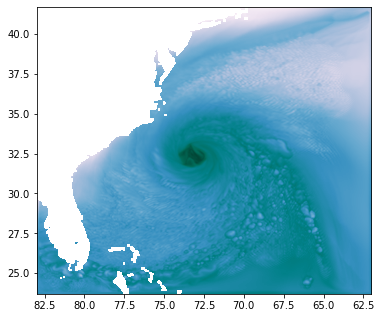

In [3]:
fig = plt.figure(figsize=(6,6))

dataS = load_slice(29, 0) # last timestep and Z=50 slice
image = plt.imshow(dataS, extent=[83, 62,23.7, 41.7], cmap=plt.get_cmap("PuBuGn"))

# Demonstrating the itkwidget image viewer, line_profile, volume viewer

In [4]:
view(image=dataS, cmap="Muted Blue-Green",vmin=np.nanmin(dataS), vmax=np.nanmax(dataS))

Viewer(cmap=['Muted Blue-Green'], geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImag…

In [5]:
lp = line_profile(image=dataS, cmap="Muted Blue-Green",plotter='ipympl')
lp

In [7]:
np_data = load_volume(1)
print(np.nanmin(np_data), np.nanmax(np_data))

og = [[{'position': 0.36,
   'height': 1,
   'width': 0.2222222222222222,
   'xBias': 0.49055555555555547,
   'yBias': 1.4545454545454541}]]
v=view(np_data, gradient_opacity=.4,sample_distance=.0, cmap="Muted Blue-Green", opacity_gaussians=og)
v

opening  /scratch/snx3000/jfavre/Isabel/QVAPORf01.bin.gz
9.1368764e-07 0.021656003


Viewer(cmap=['Muted Blue-Green'], geometries=[], gradient_opacity=0.4, opacity_gaussians=[[{'position': 0.36, …

In [8]:
# load a different timestep
v.image = load_volume(40)

opening  /scratch/snx3000/jfavre/Isabel/QVAPORf40.bin.gz
